# Clustering comparison

### Generate datasets
We choose the size big enough to see the scalability of the algorithms, but we don't want the example to take too long.

In [1]:
import numpy as np
from sklearn import datasets
from collections import OrderedDict

np.random.seed(0)
n_samples = 2500
ds = OrderedDict()

In [2]:
ds['noisy_circles'] = datasets.make_circles(
    n_samples=n_samples, factor=.5, noise=.05)

In [3]:
ds['noisy_moons'] = datasets.make_moons(
    n_samples=n_samples, noise=.05)

In [4]:
ds['blobs'] = np.concatenate([
    np.array([[0,-1]]) + 0.5 * np.random.randn(n_samples//3, 2),
    np.array([[5, 0]]) + 0.1 * np.random.randn(n_samples//3, 2),
    np.array([[0, 5]]) + 2.0 * np.random.randn(n_samples//3, 2),
]), None

In [5]:
ds['no_structure'] = np.random.rand(n_samples, 2), None

In [6]:
# Scale the example data
from sklearn.preprocessing import StandardScaler
ds = OrderedDict((name, StandardScaler().fit_transform(X))
                 for name, (X, y) in ds.items())

### Enumerate clustering choices

In [7]:
from msmbuilder import cluster
algos = [
    (cluster.KMedoids, 3, 'euclidean'),
    (cluster.MiniBatchKMedoids, 3, 'cosine'),
]

In [9]:
import time

results = {}
for ds_name, X in ds.items():    
    for algo, param1, param2 in algos:
        algorithm = algo(n_clusters=param1, metric=param2)
        t0 = time.time()
        algorithm.fit([X])
        t1 = time.time()
        
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_[0].astype(np.int)
        else:
            y_pred = algorithm.transform([X])[0]
            
        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
        else:
            centers = []
            
        results[ds_name, algo.__name__] = (t1-t0, y_pred, centers) 

### Plot

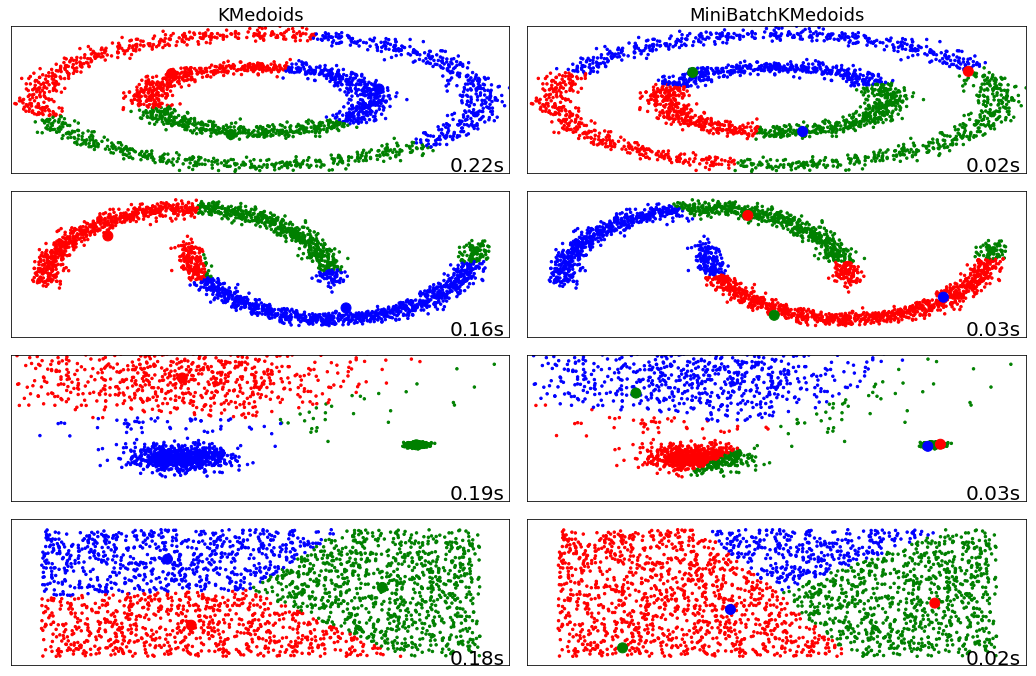

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.figure(figsize=(14.5, 9.5))
plot_num = 1
titles = True
for ds_name, X in ds.items():
    for algo, param1, param2 in algos:
        t, y_pred, centers = results[ds_name, algo.__name__]        
        plt.subplot(4, 2, plot_num)        
        if titles:
            plt.title(algo.__name__, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=6)
        center_colors = colors[:len(centers)]
        plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, '{:.2f}s'.format(t),
                 transform=plt.gca().transAxes, size=20,
                 horizontalalignment='right')
        plot_num += 1
    titles = False
plt.tight_layout()